In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/Reliance Industries Limited.csv")
df.head()

,date,open,high,low,close,volume,symbol,name
0,2021-07-23,2135.0000,2135.0000,2102.8501,2105.2000,253418,RELIANCE.BSE,Reliance Industries Limited
1,2021-07-22,2111.2000,2124.1001,2098.8000,2121.0000,170937,RELIANCE.BSE,Reliance Industries Limited
2,2021-07-20,2097.3501,2108.1001,2084.0000,2093.6001,262169,RELIANCE.BSE,Reliance Industries Limited
3,2021-07-19,2104.0000,2124.0000,2093.0000,2099.1001,1466286,RELIANCE.BSE,Reliance Industries Limited
4,2021-07-16,2085.0000,2114.5000,2085.0000,2111.8000,333073,RELIANCE.BSE,Reliance Industries Limited


In [3]:
df = df[["date", "open"]]
df.head()

,date,open
0,2021-07-23,2135.0000
1,2021-07-22,2111.2000
2,2021-07-20,2097.3501
3,2021-07-19,2104.0000
4,2021-07-16,2085.0000


In [68]:
df["open"] = df["open"].rolling(window=5).mean()
df.dropna(inplace=True)
df.reset_index(inplace = True)

In [79]:
time_step = 20 # smoother
train_x = []
train_y = []
for i in range(time_step, len(df)):
    train_x.append(df.loc[i-time_step: i-1,"open"])
    train_y.append(df.loc[i, "open"])
    
train_x = np.array(train_x)
train_y = np.array(train_y)

In [80]:
print(train_x.shape)
print(train_y.shape)

(4046, 20)
(4046,)


In [81]:
train_x[0]

array([2097.2963992, 2098.7011952, 2101.9203936, 2106.3307952,
       2111.2351976, 2115.3668   , 2117.5416024, 2118.0460048,
       2117.8520048, 2118.8824048, 2123.8388048, 2134.0328056,
       2149.0696056, 2167.2144072, 2185.7444096, 2201.5328128,
       2213.2608144, 2220.2440152, 2223.4564144, 2223.9212112])

In [82]:
train_y[0]

2222.686404799998

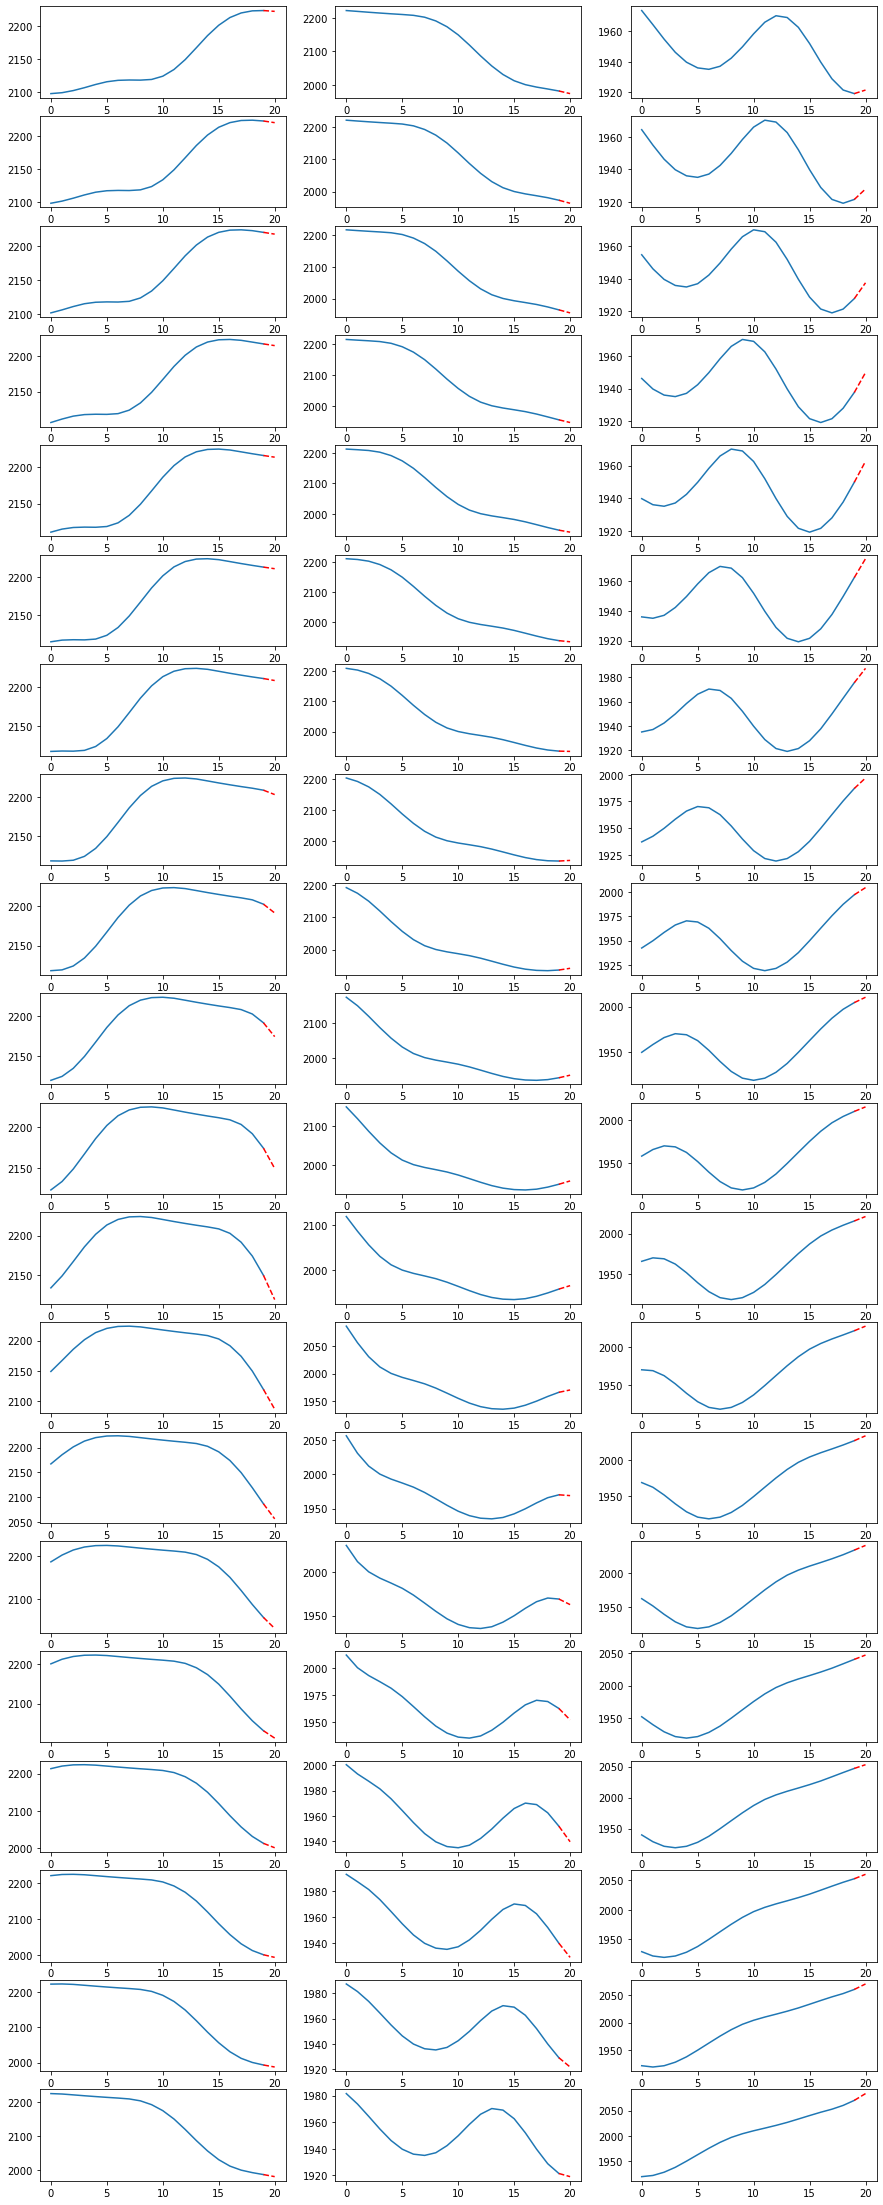

In [83]:
l = 20
w = 3
fig, ax = plt.subplots(l, w, figsize= (15, 40))

x, y = np.meshgrid(range(l), range(w))
indices = np.column_stack([x.flatten(), y.flatten()])
counter = 0
for i, j in indices:
    ax[i][j].plot(train_x[counter])
    ax[i][j].plot([time_step-1, time_step], 
                  [train_x[counter][-1], train_y[counter]], 
                  linestyle="--", color="red")
    counter += 1

In [84]:
## Check for pct change on the previous days to get the possible change in the current day as well.